### 머신러닝 알고리즘을 이용한 abalone 데이터 분류

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#파일 불러오기
df = pd.read_csv(r"C:\Users\DoHyeonjik\GachonUniv\3-2\딥러닝응용\2\abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
#colmns 보기
print(df.columns)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


#### <열 인덱스>
* id : 행 인덱스
* sex : 성별
* Length : 길이
* Diameter : 직경
* Height : 높이
* Whole_weight : 전체무게
* Shucked_weight : 껍질을 벗긴 무게
* Viscera_weight : 내장 무게
* Shell_weight: 껍질 무게
* Rings : 전복의 나이를 알 수 있는 반지 수

In [3]:
#데이터 전처리
# 1) 결측치 확인
df.isnull().sum() 

# 2) 문자열로 범주화된 Sex를 라벨 인코딩으로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
print(df)

        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    2   0.455     0.365   0.095        0.5140          0.2245   
1        1    2   0.350     0.265   0.090        0.2255          0.0995   
2        2    0   0.530     0.420   0.135        0.6770          0.2565   
3        3    2   0.440     0.365   0.125        0.5160          0.2155   
4        4    1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1          

C:\TempFolder\ipykernel_25164\620756726.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist= False, ax=ax1)
C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\TempFolder\ipykernel_25164\620756726.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

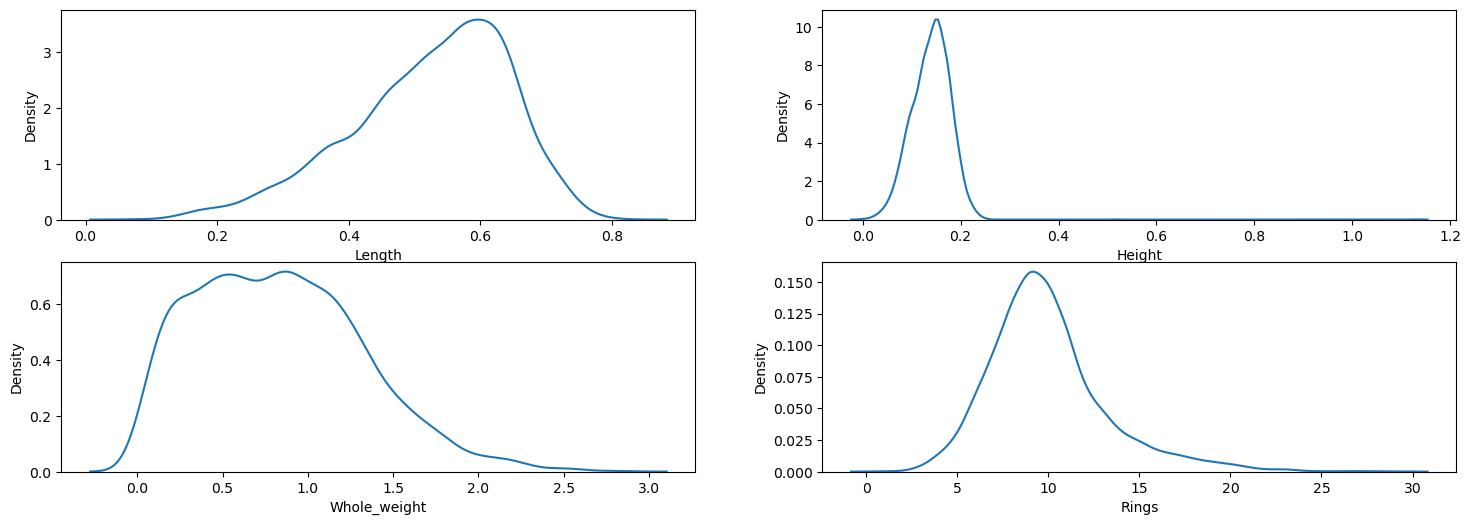

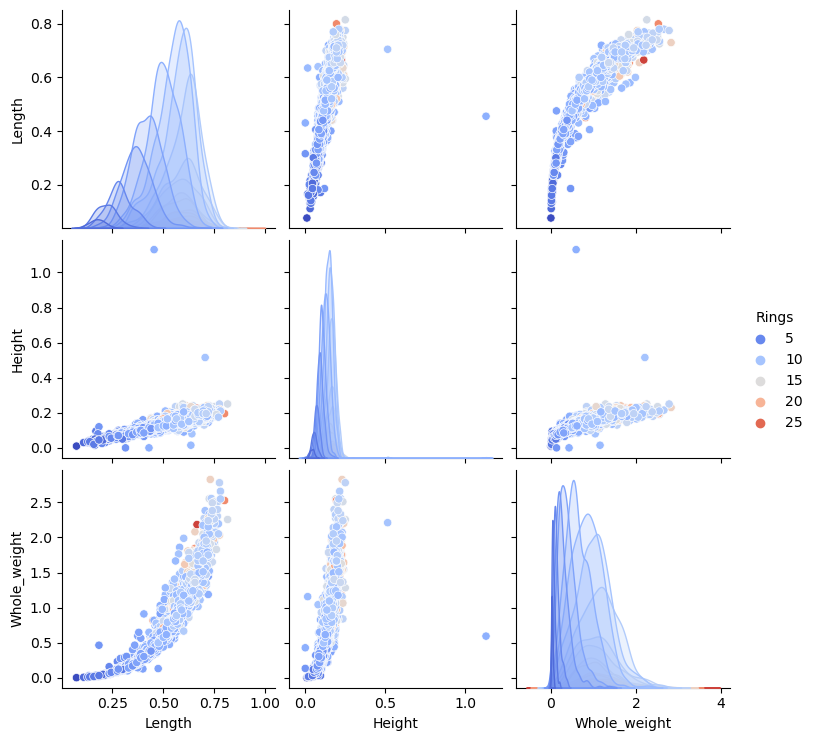

In [4]:
#데이터 분석 및 시각화
# 1) 히스토그램
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(2,2,1)
sns.distplot(df['Length'], kde = True, hist= False, ax=ax1)
ax2 = plt.subplot(2,2,2)
sns.distplot(df['Height'], kde = True, hist= False, ax=ax2)
ax3 = plt.subplot(2,2,3)
sns.distplot(df['Whole_weight'], kde= True, hist=False, ax=ax3)
ax4 = plt.subplot(2,2,4)
sns.distplot(df['Rings'], kde= True, hist=False, ax=ax4)

# 2) 상관관계
sns.pairplot(df, vars=['Length','Height', 'Whole_weight'], hue = 'Rings', palette="coolwarm")
plt.show()

### Rings의 범위가 너무 넒어서 구분이 어려움 -> 범주화

In [5]:
#rings데이터 범주화
print(df['Rings'].min(),"~",df['Rings'].max())
bins = [0,7,14, float('inf')]
df['Rings'] = pd.cut(df['Rings'], bins=bins, labels=[0,1,2], right=False)


1 ~ 29


In [6]:
#df을 데이터와 레이블로 분할
df_data = df.drop('Rings', axis=1)
print(df_data.head())

df_label = df['Rings']
print(df_label.head())


   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  
0          0.1010         0.150  
1          0.0485         0.070  
2          0.1415         0.210  
3          0.1140         0.155  
4          0.0395         0.055  
0    2
1    1
2    1
3    1
4    1
Name: Rings, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [7]:
#훈련 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=0)
print("train_data:", len(x_train)) 
print("test_data:", len(x_test))
print("train_label:", len(y_train))
print("test_label:", len(y_test))

train_data: 3341
test_data: 836
train_label: 3341
test_label: 836


In [8]:
##머신러닝 시작
# 1) SVM
from sklearn.svm import SVC
model_svm = SVC(kernel='linear',random_state=0)
model_svm.fit(x_train, y_train) 

svm_predict = model_svm.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, svm_predict))
print(confusion_matrix(y_test, svm_predict))

0.7990430622009569
[[ 38  58   0]
 [ 12 609  24]
 [  0  74  21]]


In [9]:
# 2) DT(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(random_state=0)
model_DT.fit(x_train, y_train)
DT_predict = model_DT.predict(x_test)

print(accuracy_score(y_test, DT_predict))
print(confusion_matrix(y_test, DT_predict))

0.7930622009569378
[[ 61  35   0]
 [ 38 552  55]
 [  0  45  50]]


In [10]:
# 3) RF(Random Forest)
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(x_train, y_train)
RF_predict = model_RF.predict(x_test)

print(accuracy_score(y_test, RF_predict))
print(confusion_matrix(y_test, RF_predict))

0.8456937799043063
[[ 67  29   0]
 [ 23 598  24]
 [  0  53  42]]


In [11]:
# 4) LR(로지스틱 회귀)
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(random_state=0, max_iter=1200)
#기존 학습에서 문제가 있어서 max_iter 500으로 설
model_LR.fit(x_train, y_train)
LR_predict = model_LR.predict(x_test)

print(accuracy_score(y_test, LR_predict))
print(confusion_matrix(y_test, LR_predict))

0.833732057416268
[[ 62  34   0]
 [ 17 620   8]
 [  0  80  15]]


In [12]:
# 5) KNN
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=10) # 10 이상은 acc가 늘지 않고 26부터 떨어짐
model_KNN.fit(x_train, y_train)
KNN_predict = model_KNN.predict(x_test)

print(accuracy_score(y_test, KNN_predict))
print(confusion_matrix(y_test, KNN_predict))

0.7787081339712919
[[ 39  55   2]
 [ 25 597  23]
 [  4  76  15]]
